In [391]:
# Importing necessary libraries for data analysis and visualization

# Importing pandas library for data manipulation and analysis
import pandas as pd
# Importing numpy library for scientific computing
import numpy as np
# Importing seaborn library for creating informative and attractive statistical graphics
import seaborn as sns
# Importing matplotlib.pyplot library for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

In [392]:
# Reading the data file using pandas library and storing its contents in a DataFrame object

df=pd.read_csv("framingham_heart_disease.csv")

In [393]:
# Displaying the column names of the DataFrame

df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [394]:
# Counting the number of missing values in each column of the DataFrame

df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [395]:
# Displaying the first few rows of the DataFrame

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [396]:
#since education has vey less influence in this prediction and it having a large number of null values, drop the attribute

data = df.drop(['education'], axis = 1)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Finding mean of attributes and replacing null values with mean values

In [397]:
# Calculating the mean values of certain columns of the DataFrame

mean_cigsPerDay = round(data["cigsPerDay"].mean())
mean_BPmeds = round(data["BPMeds"].mean())
mean_totChol = round(data["totChol"].mean())
mean_BMI = round(data["BMI"].mean())
mean_glucose = round(data["glucose"].mean())
mean_heartRate = round(data["heartRate"].mean())

In [398]:
# Replace missing values with Mean values

data['cigsPerDay'].fillna(mean_cigsPerDay, inplace = True)
data['BPMeds'].fillna(mean_BPmeds, inplace = True)
data['totChol'].fillna(mean_totChol, inplace = True)
data['BMI'].fillna(mean_BMI, inplace = True)
data['glucose'].fillna(mean_glucose, inplace = True)
data['heartRate'].fillna(mean_heartRate, inplace = True)

C:\Users\vanac\AppData\Local\Temp\ipykernel_10168\2824471032.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['cigsPerDay'].fillna(mean_cigsPerDay, inplace = True)
C:\Users\vanac\AppData\Local\Temp\ipykernel_10168\2824471032.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [399]:
# Ensure that all missing values are filled

data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Analysis through visualizing data

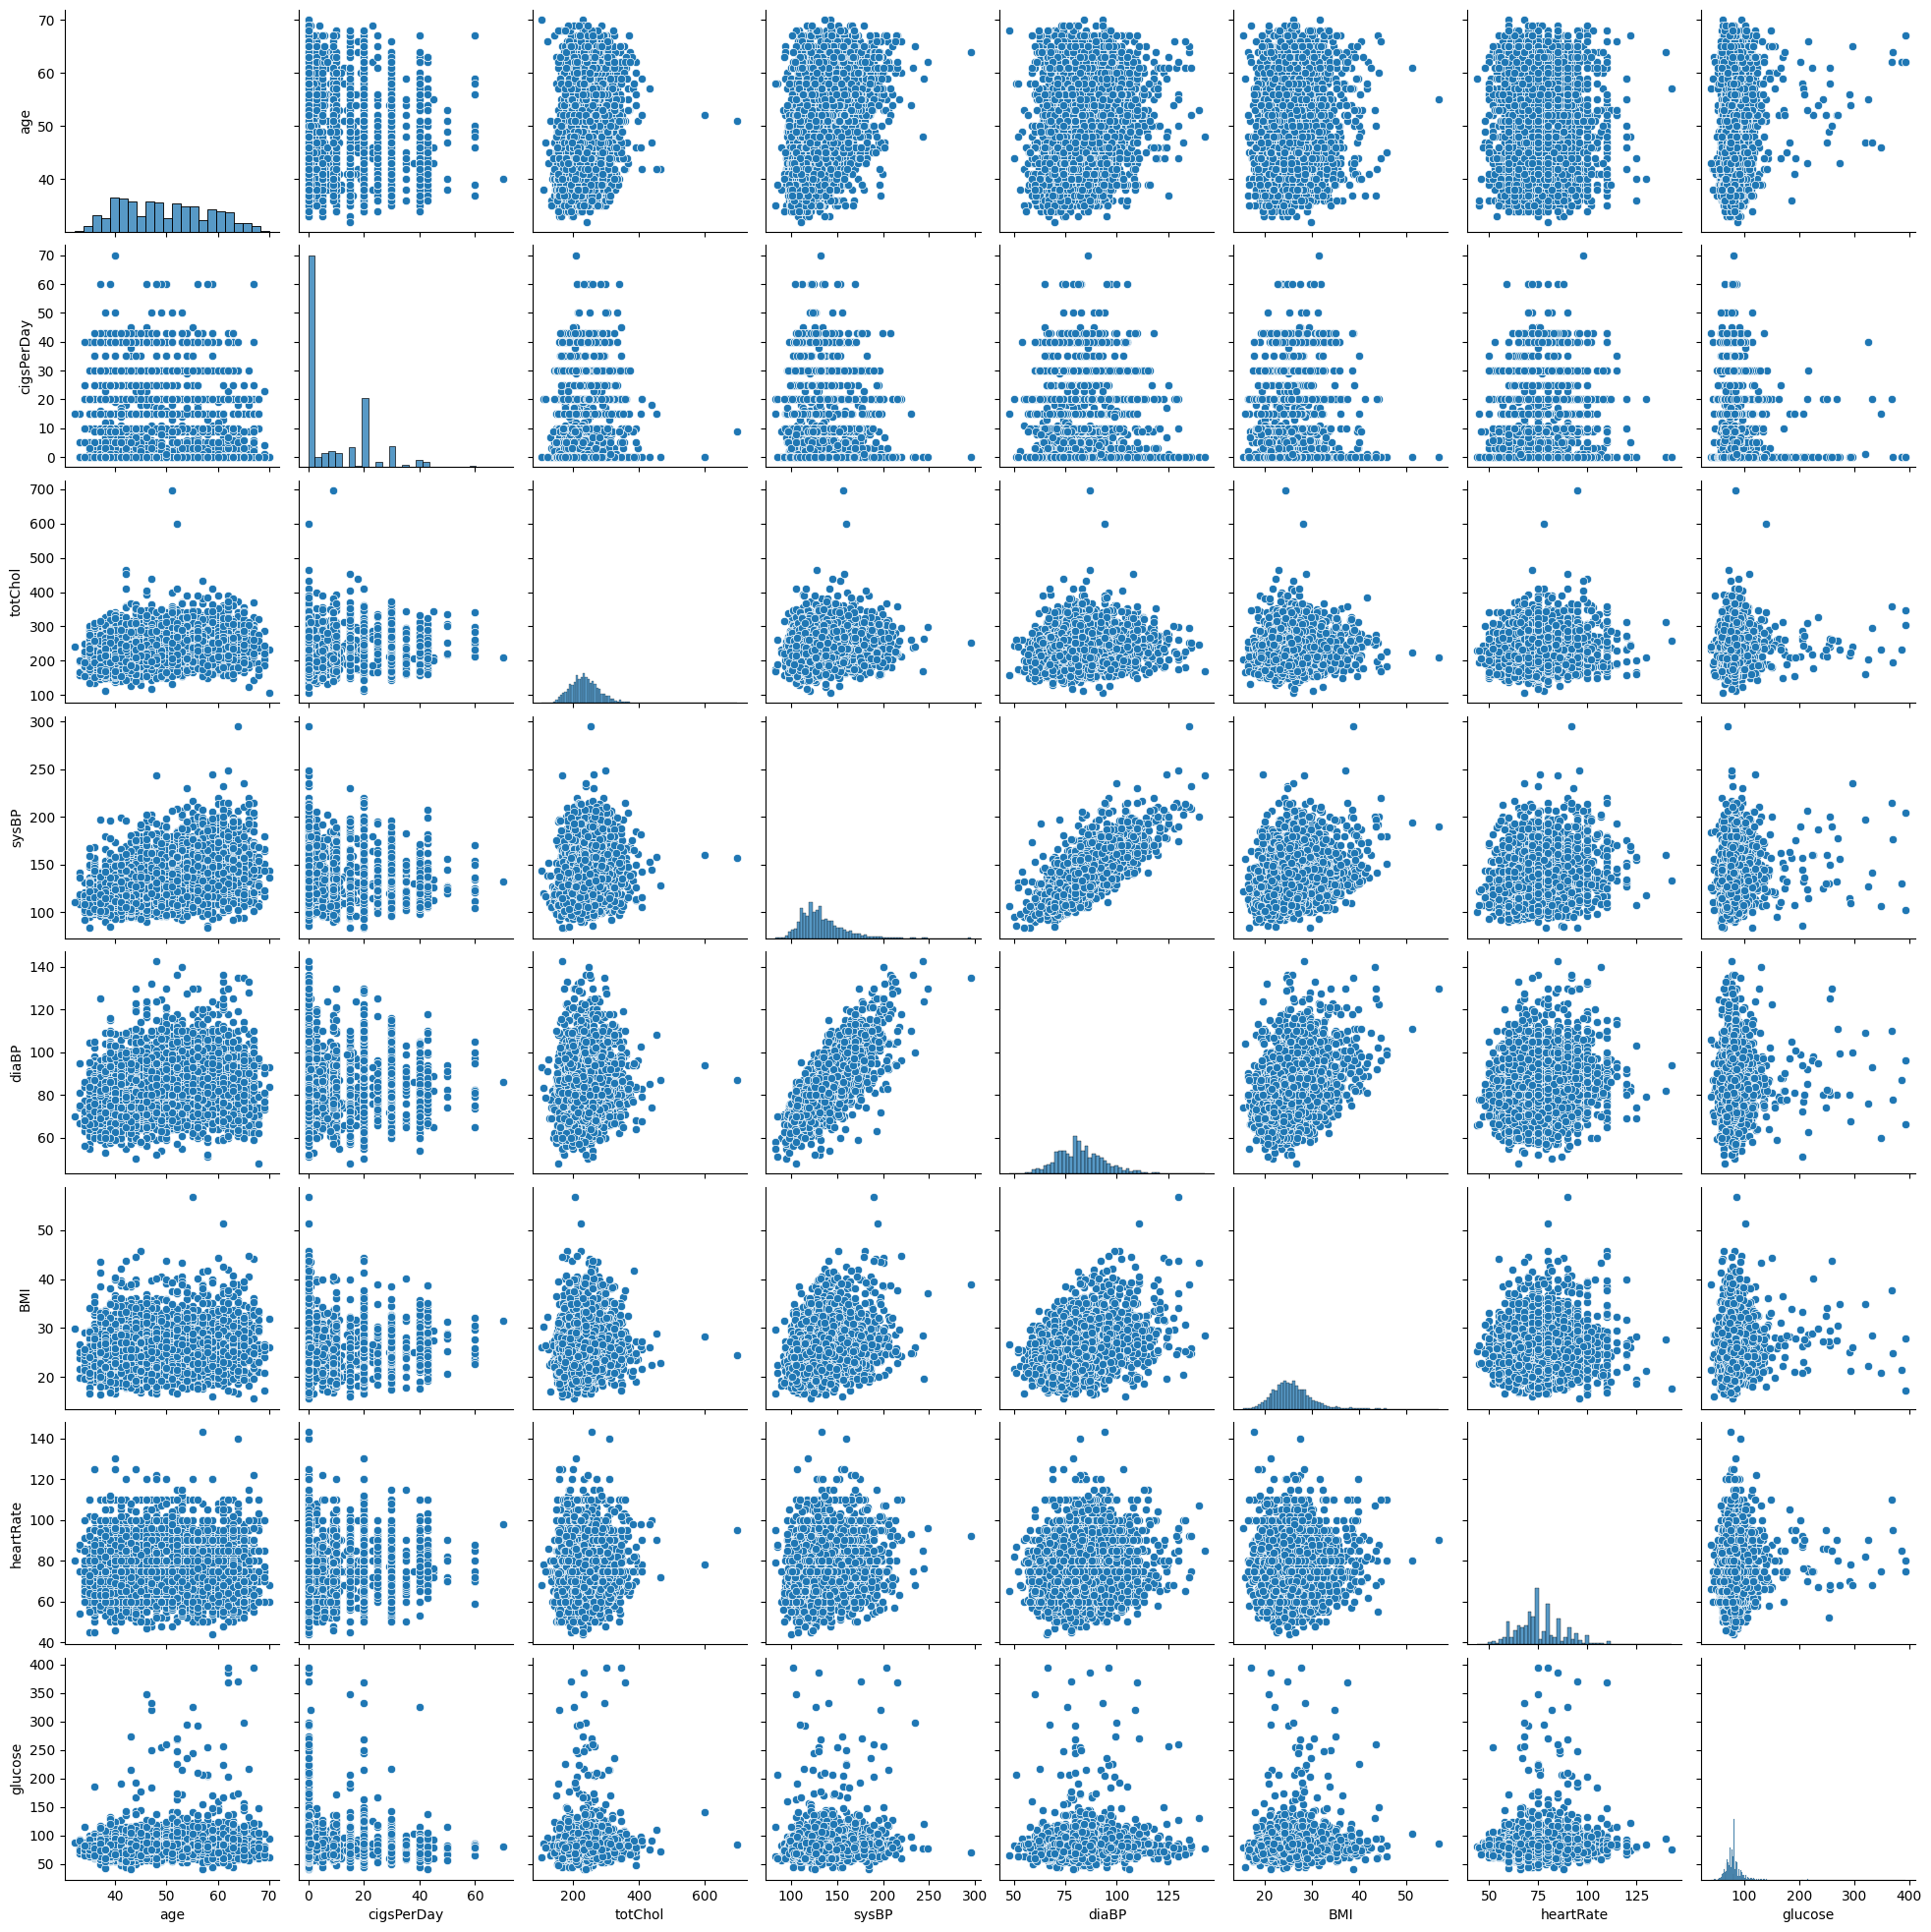

In [400]:
# Creating a pairwise scatter plot of selected columns in the DataFrame

sns.pairplot(data[["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]]);

In [401]:
# Splitting the DataFrame into predictor variables and target variable

X = data.drop('TenYearCHD',axis=1)

# Load the target variable to y

y=data['TenYearCHD']

In [402]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [403]:
# Train/Test splitting of data 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

<Axes: xlabel='TenYearCHD'>

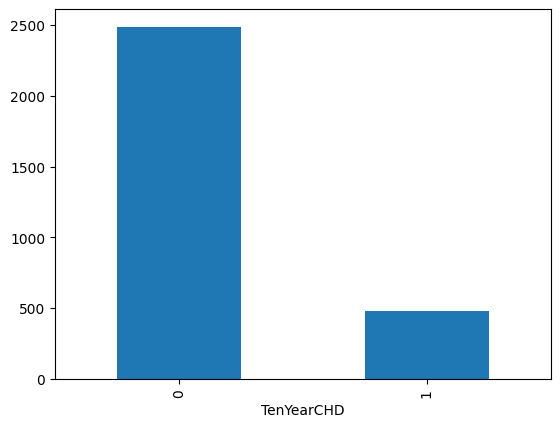

In [404]:
y_train.value_counts().plot(kind='bar')

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

The most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short.

<Axes: xlabel='TenYearCHD'>

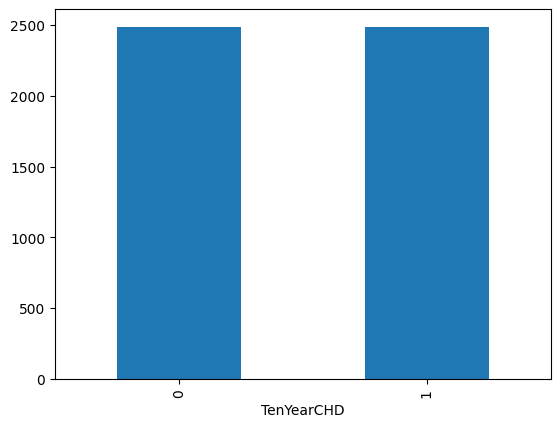

In [405]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)
y_train.value_counts().plot(kind='bar')

In [406]:

from sklearn.linear_model import LogisticRegression


# Train het model
Classifier = LogisticRegression(max_iter=10000)
Classifier.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [407]:

# Predicting the target variable using the trained model and the test data
y_test_hat = Classifier.predict(X_test)

# Creating a DataFrame to store the actual and predicted values of the target variable
Results = pd.DataFrame({'Actual': y_test, 'Predictions': y_test_hat})

# Displaying the first 5 rows of the Results DataFrame
Results.head(100)

,Actual,Predictions
906,0,0
857,0,0
2761,0,0
108,1,1
2894,0,0
...,...,...
1189,0,1
3070,1,0
3261,0,1
98,0,1


In [408]:
# Importing the accuracy_score function from the scikit-learn library
from sklearn.metrics import accuracy_score

# Calculating the accuracy score of the predicted values
print(accuracy_score(y_test,y_test_hat))

0.6823899371069182


In [409]:
# Predicting the target variable for the training data
y_train_hat = Classifier.predict(X_train)

In [410]:
# Calculating the accuracy score of the predicted values for the training data
print(accuracy_score(y_train, y_train_hat))

0.6897106109324759


In [411]:
y_test_hat_proba = Classifier.predict_proba(X_test)
y_test_hat_proba

array([[0.52360301, 0.47639699],
       [0.84210651, 0.15789349],
       [0.85942115, 0.14057885],
       ...,
       [0.32594086, 0.67405914],
       [0.28074876, 0.71925124],
       [0.70542269, 0.29457731]])

In [412]:
# Import the confusion_matrix function from sklearn.metrics module
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the test set and output it to the console.
cm = confusion_matrix(y_test,y_test_hat)
print(cm)

[[759 347]
 [ 57 109]]


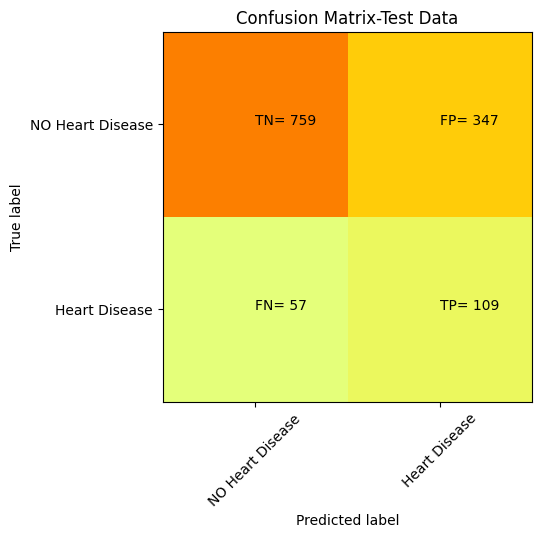

In [413]:
# Displaying an image of the confusion matrix with the Wistia color map
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)

# Creating a list of class names and setting the title, x-label and y-label of the plot
classNames = ['NO Heart Disease','Heart Disease']
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Setting the ticks and labels for the x and y axes
tick_marks = np.arange(2)
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# Adding the values of True Negatives, False Positives, False Negatives and True Positives to the plot
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j])+"= "+str(cm[i][j]))

# Displaying the plot
plt.show()


The number of False negative ( people who should have been predicted as CHD positive were predicted as negative ) is high in the original notebook and i think this is the worst type of prediction our model can make. i think this i beter because i have more true positive and that is what we want to predict 

In [414]:
# Import the classification_report function from sklearn.metrics module
from sklearn.metrics import classification_report

# Call the classification_report function with y_test and y_test_hat as arguments and print the report, which includes metrics such as precision, recall, F1-score, and support for each class in the classification model


print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79      1106
           1       0.24      0.66      0.35       166

    accuracy                           0.68      1272
   macro avg       0.58      0.67      0.57      1272
weighted avg       0.84      0.68      0.73      1272



In [415]:
# Calculate metrics values individually
# Assigning Variables for convinience

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [416]:
# Calculating precision, recall, specificity, and accuracy mathematically by using their equations 

In [417]:
recall = TP / (TP + FN )
print("Recall= ",recall)

Recall=  0.6566265060240963


In [418]:
precision = TP / (TP + FP)
print("Precision=",precision)

Precision= 0.23903508771929824


In [419]:
specificity = TN /  (TN + FP)
print("Specificity = ", specificity)

Specificity =  0.6862567811934901


In [420]:
accuracy = ( TP + TN ) / ( TP + TN + FP + FN)
print("Accuracy =" , accuracy)

Accuracy = 0.6823899371069182
